In [ ]:
'''
Для выбранного датасета с сайта https://github.com/YBI-Foundation/Dataset 

1. Очистите его от выбросов и пропусков. 

2. Выберите две количественные переменные и найдите для них 95% доверительные интервалы средних значений. 
   Дайте интерпретацию результата. 

3. Оцените распределение этих переменных на нормальность с помощью формальных тестов и с помощью 
   альтернативных методов. Сделайте вывод. 

4. Возьмите две группы наблюдений и протестируйте гипотезу о равенстве математических ожиданий 
   (двухвыборочный т-тест или тест Манна-Уитни в зависимости от результата теста на нормальность). 
   Сделайте вывод. 

5. Постройте точечную диаграмму (scatterplot) и оцените корреляцию между переменными. Сделайте вывод. 

6. Оцените модель линейной регрессии. Сделайте на ее основе прогноз и вывод по результатам. 

7. Срок – до 21 октября 

'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
df_Bike_Prices = pd.read_csv(r"https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Bike%20Prices.csv")
df = df_Bike_Prices.drop_duplicates()
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [3]:
df.shape

(1055, 8)

In [4]:
# 1. Очистка от пропусков 

# Проверяем, есть ли в датасете пропуски 
df.isna().sum()
# В столбце 'Ex_Showroom_Price' есть 433 пропуска 

Brand                  0
Model                  0
Selling_Price          0
Year                   0
Seller_Type            0
Owner                  0
KM_Driven              0
Ex_Showroom_Price    433
dtype: int64

In [5]:
# Заполняем пропуски 
na_index = df[df['Ex_Showroom_Price'].isna()].index 

#df['Ex_Showroom_Price'] = df['Ex_Showroom_Price'].fillna(0) 
df.loc[na_index, 'Ex_Showroom_Price'] = 0 

In [6]:
# Проверяем, есть ли в датасете пропуски 
df.isna().sum() 
# Пропусков нет 

Brand                0
Model                0
Selling_Price        0
Year                 0
Seller_Type          0
Owner                0
KM_Driven            0
Ex_Showroom_Price    0
dtype: int64

In [7]:
# 1. Очистка от выбросов 

print("Выбросами считаются мотоциклы: ")

q1 = df['Year'].quantile(0.25)
q3 = df['Year'].quantile(0.75)
iqr = q3 - q1
lb_Year = int(q1 - 1.5*iqr)
ub_Year = int(q3 + 1.5*iqr)
print(f"   1. Если год выпуска (Year) находится за пределами интервала: [{lb_Year}, {ub_Year}].")

q1 = df['Selling_Price'].quantile(0.25)
q3 = df['Selling_Price'].quantile(0.75)
iqr = q3 - q1
lb_Selling_Price = q1 - 1.5*iqr
ub_Selling_Price = q3 + 1.5*iqr
print(f"   2. Если цена продажи (Selling_Price) находится за пределами интервала: [{lb_Selling_Price}, {ub_Selling_Price}] у.е.")

q1 = df['Ex_Showroom_Price'].quantile(0.25)
q3 = df['Ex_Showroom_Price'].quantile(0.75)
iqr = q3 - q1
lb_Ex_Showroom_Price = q1 - 1.5*iqr
ub_Ex_Showroom_Price = q3 + 1.5*iqr
print(f"   3. Если шоурумная цена (Ex_Showroom_Price) находится за пределами интервала: [{lb_Ex_Showroom_Price}, {ub_Ex_Showroom_Price}] у.е.")

q1 = df['KM_Driven'].quantile(0.25)
q3 = df['KM_Driven'].quantile(0.75)
iqr = q3 - q1
lb_KM_Driven = q1 - 1.5*iqr
ub_KM_Driven = q3 + 1.5*iqr
print(f"   4. Если пробег (KM_Driven) находится за пределами интервала: [{lb_KM_Driven}, {ub_KM_Driven}] км.")


Выбросами считаются мотоциклы: 
   1. Если год выпуска (Year) находится за пределами интервала: [2002, 2026].
   2. Если цена продажи (Selling_Price) находится за пределами интервала: [-35000.0, 133000.0] у.е.
   3. Если шоурумная цена (Ex_Showroom_Price) находится за пределами интервала: [-117769.5, 196282.5] у.е.
   4. Если пробег (KM_Driven) находится за пределами интервала: [-30750.0, 87250.0] км.


In [8]:
# Очищаем датафрейм от выбросов 
df = df[(df['Year']>=lb_Year)&(df['Year']<=ub_Year)]
df = df[(df['Selling_Price']>=lb_Selling_Price)&(df['Selling_Price']<=ub_Selling_Price)]
df = df[(df['Ex_Showroom_Price']>=lb_Ex_Showroom_Price)&(df['Ex_Showroom_Price']<=ub_Ex_Showroom_Price)]
df = df[(df['KM_Driven']>=lb_KM_Driven)&(df['KM_Driven']<=ub_KM_Driven)]

# Датафрейм без выбросов 
df 
# Было 1055 записей, без выбросов осталось 908 записей.

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0
...,...,...,...,...,...,...,...,...
1056,Royal,Royal Enfield Electra 5 S,90000,2012,Individual,1st owner,40000,0.0
1057,Hero,Hero Honda Hunk,20000,2010,Individual,1st owner,17000,0.0
1058,Bajaj,Bajaj Pulsar 220 DTS-i,60000,2014,Individual,1st owner,16000,0.0
1059,Hero,Hero Honda CBZ extreme,40000,2009,Individual,1st owner,50000,0.0


In [39]:
# 2. Выберите две количественные переменные и найдите для них 95% доверительные интервалы средних значений. 
#    Дайте интерпретацию результата. 
    
    
df_1owner = df.loc[df['Owner']=='1st owner', 'KM_Driven']
df_2owner = df.loc[df['Owner']=='2nd owner', 'KM_Driven']
df_3owner = df.loc[df['Owner']=='3rd owner', 'KM_Driven']

alpha = 0.95

mean_1owner = df_1owner.mean()
var_1owner = df_1owner.var()
n_1owner = df_1owner.count()

ci_1owner = stats.norm.interval(confidence = alpha, loc = mean_1owner, scale = np.sqrt(var_1owner/n_1owner))
print(f'Первый владелец: 95% доверительный интервал для среднего пробега от {ci_1owner[0].round(2)} до {ci_1owner[1].round(2)} км.')

mean_2owner = df_2owner.mean()
var_2owner = df_2owner.var()
n_2owner = df_2owner.count()

ci_2owner = stats.norm.interval(confidence = alpha, loc = mean_1owner, scale = np.sqrt(var_2owner/n_2owner))
print(f'Второй владелец: 95% доверительный интервал для среднего пробега от {ci_2owner[0].round(2)} до {ci_2owner[1].round(2)} км.')

mean_3owner = df_3owner.mean()
var_3owner = df_3owner.var()
n_3owner = df_3owner.count()

ci_3owner = stats.norm.interval(confidence = alpha, loc = mean_1owner, scale = np.sqrt(var_3owner/n_3owner))
print(f'Третий владелец: 95% доверительный интервал для среднего пробега от {ci_3owner[0].round(2)} до {ci_3owner[1].round(2)} км.')

print('\n'+'Чем больше владельцев было у мотоцикла, тем шире доверительный интервал для среднего пробега. ')


Первый владелец: 95% доверительный интервал для среднего пробега от 27620.51 до 30302.68 км.
Второй владелец: 95% доверительный интервал для среднего пробега от 25455.17 до 32468.02 км.
Третий владелец: 95% доверительный интервал для среднего пробега от 15358.73 до 42564.47 км.

Чем больше владельцев было у мотоцикла, тем шире доверительный интервал для среднего пробега. 


In [11]:
# 3. Оцените распределение этих переменных на нормальность с помощью формальных тестов и с помощью 
#    альтернативных методов. Сделайте вывод. 

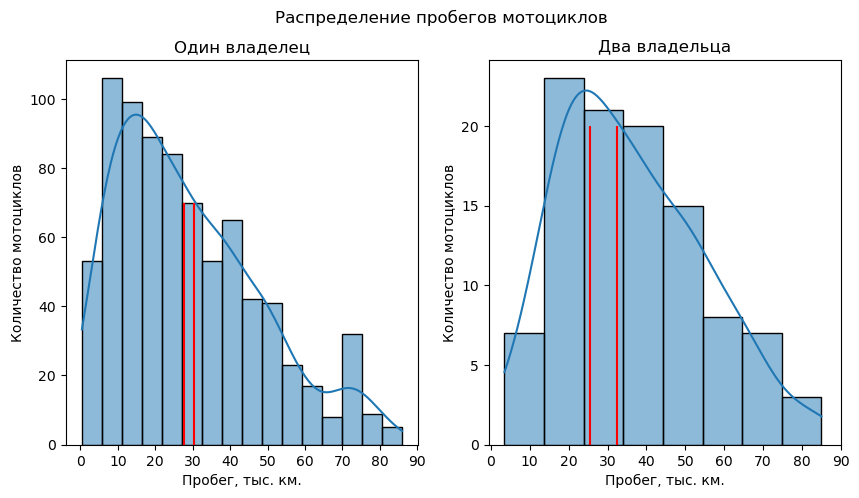

In [33]:
fig, (ax1, ax2)  = plt.subplots(1,2,figsize = (10,5))
plt.suptitle('Распределение пробегов мотоциклов')

sns.histplot(df_1owner, kde=True, ax=ax1)
ax1.vlines(x=ci_1owner, ymin=0, ymax=70, color='red')
ax1.set_title("Один владелец")
ax1.set_xticks(ticks=range(0,100000,10000), labels=range(0,100,10)) 
ax1.set_xlabel('Пробег, тыс. км.')
ax1.set_ylabel('Количество мотоциклов')

sns.histplot(df_2owner, kde=True, ax=ax2)
ax2.vlines(x=ci_2owner, ymin=0, ymax=20, color='red')
ax2.set_title("Два владельца")
ax2.set_xticks(ticks=range(0,100000,10000), labels=range(0,100,10)) 
ax2.set_xlabel('Пробег, тыс. км.')
ax2.set_ylabel('Количество мотоциклов')

plt.show()

In [12]:
# Тест Шапиро-Уилка 

# shapiro() используется для выполнения теста нормальности данных с использованием критерия Шапиро-Уилка. 
# scipy.stats.shapiro(x)
# x: это массив или последовательность данных. 
# Функция shapiro() возвращает два значения:
# statistic: значение тестовой статистики критерия Шапиро-Уилка. 
#            Оно используется для вычисления p-значения и интерпретации результатов теста.
# p-value: показывает вероятность получить такие же или более экстремальные результаты, 
#          если данные дей ствительно были бы взяты из нормального распределения.


In [13]:
stats.shapiro(df_1owner)

ShapiroResult(statistic=0.9393517971038818, pvalue=1.726407002098199e-17)

In [63]:
# p-значение очень маленькое (...e-17), т.е. нулевая гипотеза отвергается и распределение нельзя считать нормальным 

In [14]:
stats.shapiro(df_2owner)

ShapiroResult(statistic=0.9618411660194397, pvalue=0.004344044718891382)

In [ ]:
# p-значение очень маленькое (0.00434...), т.е. 0.434% и нулевая гипотеза отвергается, 
# распределение нельзя считать нормальным. 

In [ ]:
# Тест Колмогорова-Смирнова 

# kstest() используется для выполнения теста Колмогорова-Смирнова на проверку соответствия данных 
# теоретическому распределению. В том числе, нормальному.
# scipy.stats.kstest(х, cdf, args=(), N=20, alternative='two-sided', mode='auto‘)
# х: массив или последовательность данных.
# cdf: функция распределения, с которой сравниваются данные. 
# N: количество значений, которые будут использованы для аппроксимации CDF теоретического распределения. 
# alternative: определяет альтернативную гипотезу и может быть "two-sided" (двухсторонний тест), "less" (тест на меньше) или "greater" (тест на больше).


In [16]:
stats.kstest(df_1owner, stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=380, statistic_sign=-1)

In [17]:
stats.kstest(df_2owner, stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=3500, statistic_sign=-1)

In [ ]:
# р-значение является очень низким (0.0), т.е. нулевая гипотеза отвергается. 
# Распределение пробегов мотоциклов для 1-го и 2-го владельцев не являются нормальными. 

In [ ]:
# Альтернативные методы тестирования нормальности распределения 

In [18]:
print('Средняя: ', df_1owner.mean())
print('Медиана: ', df_1owner.median())
print('Скошенность: ', stats.skew(df_1owner))
print('Эксцесс: ', stats.kurtosis(df_1owner))

Средняя:  28961.597989949747
Медиана:  25000.0
Скошенность:  0.7759357740253903
Эксцесс:  -0.05315445140252839


In [19]:
print('Средняя: ', df_2owner.mean())
print('Медиана: ', df_2owner.median())
print('Скошенность: ', stats.skew(df_2owner))
print('Эксцесс: ', stats.kurtosis(df_2owner))

Средняя:  36186.74038461538
Медиана:  35000.0
Скошенность:  0.5576153545477857
Эксцесс:  -0.3471964913147456


In [ ]:
# Скошенность и эксцесс д.б. близкими к 0. 
# У нас примерно +/- около 0. Т.е. наши значения примерно близки к нормальному распределению. 

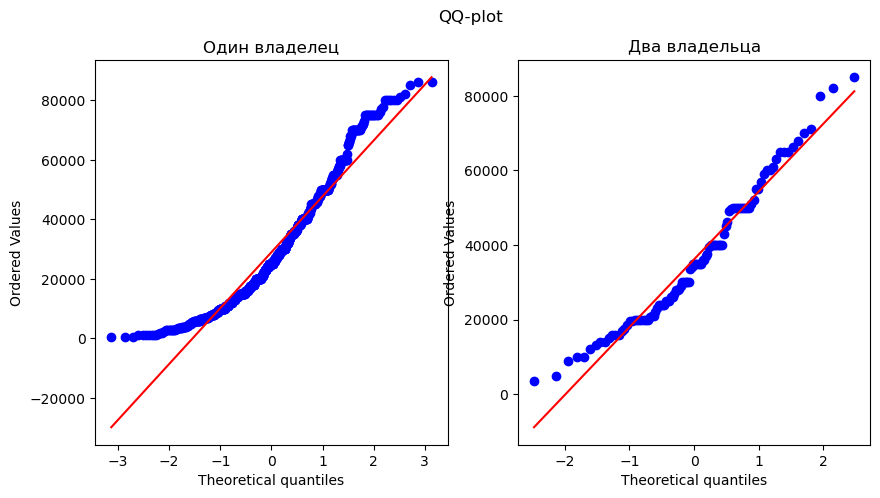

In [25]:
fig, ax  = plt.subplots(1,2, figsize = (10,5))
plt.suptitle('QQ-plot')

stats.probplot(df_1owner, dist="norm", plot = ax[0])
stats.probplot(df_2owner, dist="norm", plot = ax[1])
ax[0].set_title("Один владелец")
ax[1].set_title("Два владельца")

plt.show()

In [ ]:
# Чем ближе точки находятся к красной линии, тем ближе распределение к нормальному. 

In [ ]:
# 4. Возьмите две группы наблюдений и протестируйте гипотезу о равенстве математических ожиданий 
#    (двухвыборочный т-тест или тест Манна-Уитни в зависимости от результата теста на нормальность). 
#    Сделайте вывод. 

In [20]:
# Тест Манна-Уитни о равенстве цен мотоциклов, у которых было 1 и 2 владельца 

In [21]:
df_1owner_price = df.loc[(df['Owner']=='1st owner'), 'Selling_Price']
df_2owner_price = df.loc[(df['Owner']=='2nd owner'), 'Selling_Price'] 

stats.mannwhitneyu(df_1owner_price, df_2owner_price, alternative = 'two-sided')

MannwhitneyuResult(statistic=52445.5, pvalue=9.06087020742044e-06)

In [32]:
# Поскольку р-значение существенно меньше 5% (...e-06), нулевая гипотеза теста о том, что 
# формы распределения цен мотоциклов, у которых было 1 и 2 владельца совпадают - отвергается. 
# Медианные цены не равны. 

In [ ]:
# Тест Уилкоксона о равенстве цен мотоциклов, у которых было 1 и 2 владельца 

In [22]:
df_1owner_price = df.loc[(df['Owner']=='1st owner'), 'Selling_Price'].sample(100, random_state = 42) 
df_2owner_price = df.loc[(df['Owner']=='2nd owner'), 'Selling_Price'].sample(100, random_state = 42) 

stats.wilcoxon(df_1owner_price.values, df_2owner_price.values)

WilcoxonResult(statistic=1472.5, pvalue=0.006281158748693829)

In [ ]:
# р-значение теста указывает, что между ценами мотоциклов, у которых было 1 и 2 владельца существует разница. 

In [24]:
print('Средняя цена мотоциклов, у которых был 1 владелец:', df_1owner_price.mean())
print('Средняя цена мотоциклов, у которых было 2 владельца:', df_2owner_price.mean())
print('Медианная цена мотоциклов, у которых был 1 владелец:', df_1owner_price.median())
print('Медианная цена мотоциклов, у которых было 2 владельца:', df_2owner_price.median())

Средняя цена мотоциклов, у которых был 1 владелец: 48280.0
Средняя цена мотоциклов, у которых было 2 владельца: 39234.99
Медианная цена мотоциклов, у которых был 1 владелец: 40000.0
Медианная цена мотоциклов, у которых было 2 владельца: 30000.0


In [ ]:
# 5. Постройте точечную диаграмму (scatterplot) и оцените корреляцию между переменными. Сделайте вывод. 

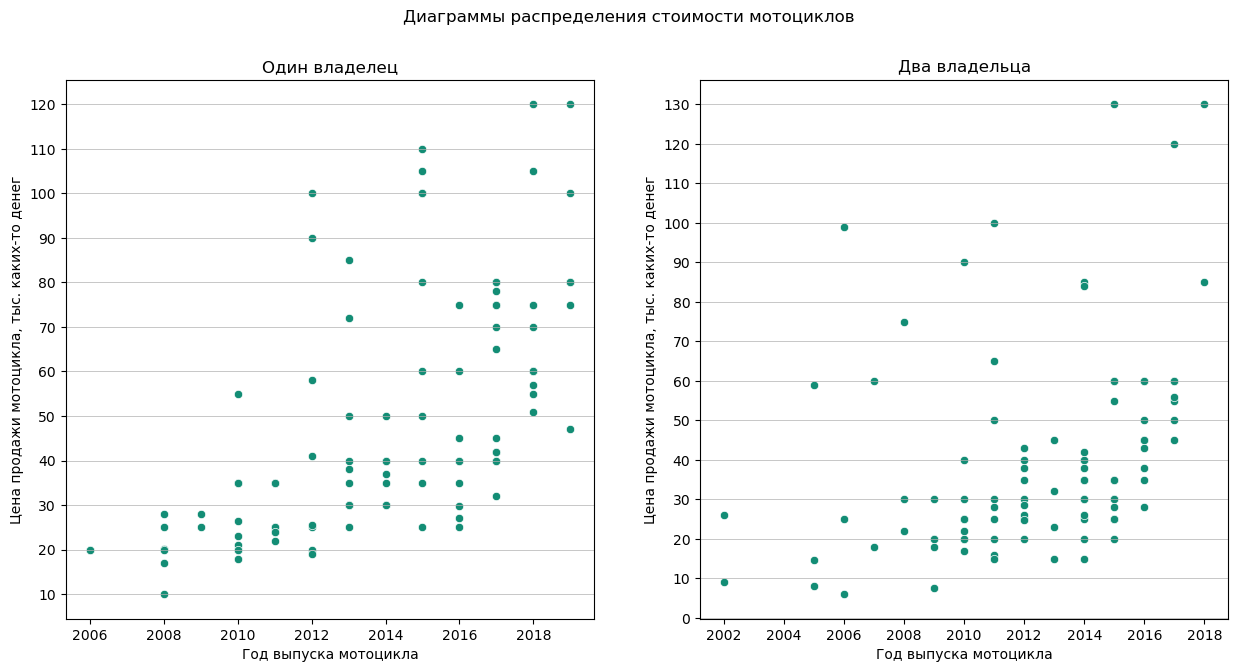

In [48]:
df_1owner_price = df.loc[(df['Owner']=='1st owner'), ['Year','Selling_Price','KM_Driven']].sample(100, random_state = 42) 
df_2owner_price = df.loc[(df['Owner']=='2nd owner'), ['Year','Selling_Price','KM_Driven']].sample(100, random_state = 42) 

fig, (ax1, ax2)  = plt.subplots(1,2, figsize = (15,7))
plt.suptitle('Диаграммы распределения стоимости мотоциклов')
ax1.set_title("Один владелец")
ax2.set_title("Два владельца")

ax1.grid(axis='y', which='major', linewidth = 0.5) 
ax2.grid(axis='y', which='major', linewidth = 0.5) 

ax1.set_xlabel('Год выпуска мотоцикла')
ax1.set_ylabel('Цена продажи мотоцикла, тыс. каких-то денег')
ax1.set_yticks(ticks=range(0,140000,10000), labels=range(0,140,10)) 

ax2.set_xlabel('Год выпуска мотоцикла')
ax2.set_ylabel('Цена продажи мотоцикла, тыс. каких-то денег')
ax2.set_yticks(ticks=range(0,140000,10000), labels=range(0,140,10)) 

sns.scatterplot(data = df_1owner_price, x = 'Year', y = 'Selling_Price', color='#138D75', ax=ax1)
sns.scatterplot(data = df_2owner_price, x = 'Year', y = 'Selling_Price', color='#138D75', ax=ax2)

plt.show()

In [ ]:
# По диаграмме видно, что стоимости мотоциклов у которых было два владельца ниже, чем cтоимости мотоциклов 
# у которых был всего один владелец. Точки на правой диаграмме преимущественно расположены в нижней части. 
# Т.е. диаграмма нам наглядно подверждает расчёты и тесты Манна-Уитни и Уилкоксона, о том, 
# что цены мотоциклов по критерию количества владельцев различаются. 

In [61]:
# Оценка корреляции между переменными: 

print('Коэффициент корреляции для мото с одним владельцем:', 
      round(df_1owner_price['Year'].corr(df_1owner_price['Selling_Price']), 2))
print('Коэффициент корреляции для мото с двумя владельцами:', 
      round(df_2owner_price['Year'].corr(df_2owner_price['Selling_Price']), 2))

Коэффициент корреляции для мото с одним владельцем: 0.61
Коэффициент корреляции для мото с двумя владельцами: 0.34


In [ ]:
# Линейная зависимость стоимости мотоциклов от года выпуска для одного владельца - сильная (модуль > 0.6). 
# Линейная зависимость стоимости мотоциклов от года выпуска для двух владельцев - слабая (модуль ~ 0.3). 
# Т.е., по-простому, как это понимаю я: если у мотика было два владельца, то год выпуска на стоимость 
# уже не так сильно влияет. Верно? 

In [63]:
# Для интереса посмотрим на зависимость стоимости мотоциклов от пробега 

print('Коэффициент корреляции для мото с одним владельцем:', 
      round(df_1owner_price['KM_Driven'].corr(df_1owner_price['Selling_Price']), 2))
print('Коэффициент корреляции для мото с двумя владельцами:', 
      round(df_2owner_price['KM_Driven'].corr(df_2owner_price['Selling_Price']), 2))

Коэффициент корреляции для мото с одним владельцем: -0.35
Коэффициент корреляции для мото с двумя владельцами: -0.29


In [ ]:
# Получается, что зависимость стоимости мотоциклов от пробега слабая. 

In [60]:
# Тогда ещё для интереса посмотрим на зависимость пробега от года выпуска мотоциклов 

print('Коэффициент корреляции для мото с одним владельцем:', 
      round(df_1owner_price['KM_Driven'].corr(df_1owner_price['Year']), 2))
print('Коэффициент корреляции для мото с двумя владельцами:', 
      round(df_2owner_price['KM_Driven'].corr(df_2owner_price['Year']), 2))

Коэффициент корреляции для мото с одним владельцем: -0.47
Коэффициент корреляции для мото с двумя владельцами: -0.31


In [ ]:
# Для мотоциклов, у которых был один владелец, год выпуска влияет на пробег, корреляция между переменными средняя, 
# а если у мотоцикла было два владельца, то год выпуска на пробег уже влияет слабо. 

In [ ]:
# 6. Оцените модель линейной регрессии. Сделайте на ее основе прогноз и вывод по результатам. 

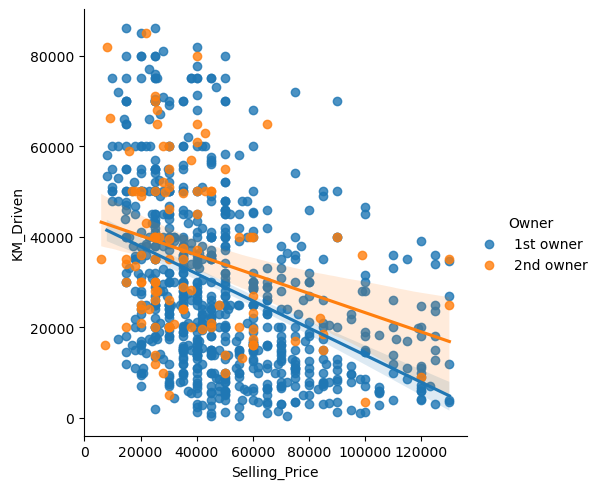

In [62]:
# Предположим, что между ценой и пробегом существует линейная взаимосвязь 

#sns.lmplot(data = df, x = 'Selling_Price', y = 'KM_Driven') 
sns.lmplot(
    data = df[(df['Owner']=='1st owner')|(df['Owner']=='2nd owner')], 
    x = 'Selling_Price', 
    y = 'KM_Driven', 
    hue = 'Owner'
)
plt.show()


In [ ]:
# Цена меньше - пробег больше. 
# Цена больше - пробег меньше. 


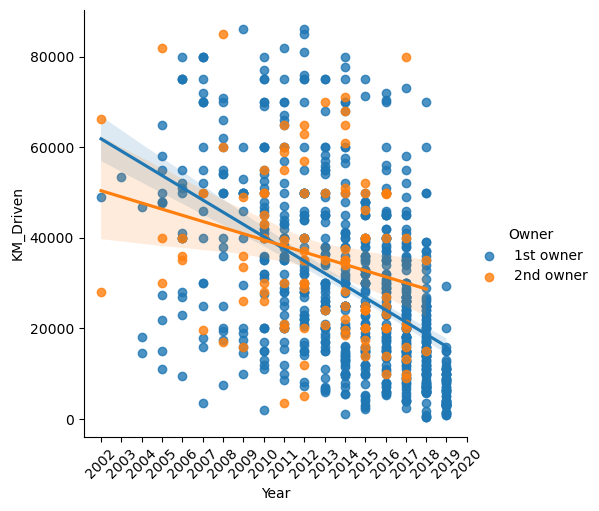

In [63]:
# Предположим, что между годом выпуска мотоцикла и пробегом существует линейная взаимосвязь 

#sns.lmplot(data = df, x = 'Year', y = 'KM_Driven')
sns.lmplot(
    data = df[(df['Owner']=='1st owner')|(df['Owner']=='2nd owner')], 
    x = 'Year', 
    y = 'KM_Driven', 
    hue = 'Owner'
)
plt.xticks(ticks=range(2002, 2021), rotation=45) 
plt.show()


In [ ]:
# Год выпуска новее - пробег меньше. 
# Год выпуска старее - пробег больше. 


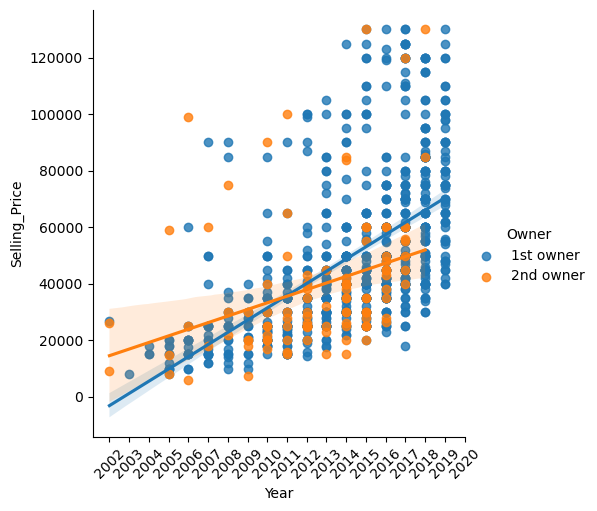

In [64]:
# Предположим, что между годом выпуска мотоцикла и ценой существует линейная взаимосвязь 

#sns.lmplot(data = df, x = 'Year', y = 'Selling_Price')
sns.lmplot(
    data = df[(df['Owner']=='1st owner')|(df['Owner']=='2nd owner')], 
    x = 'Year', 
    y = 'Selling_Price', 
    hue = 'Owner'
)
plt.xticks(ticks=range(2002, 2021), rotation=45) 
plt.show()


In [ ]:
# Год выпуска новее - цена больше. 
# Год выпуска старее - цена меньше. 


In [39]:
X = np.array(df['KM_Driven'])
Y = np.array(df['Selling_Price']/1000000)
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     49.56
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           3.47e-12
Time:                        20:11:15   Log-Likelihood:                 1560.9
No. Observations:                1055   AIC:                            -3118.
Df Residuals:                    1053   BIC:                            -3108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0676      0.002     33.192      0.0

In [ ]:
# 
# 